In [57]:
#Mengimport library numpy dengan singkatan np
import numpy as np
#Mengimport library pandas dengan singkatan pd
import pandas as pd
#Mengimport library matplotlib dengan singkatan plt
import matplotlib.pyplot as plt
#Mengimport library seaborn dengan singkatan sns, utnuk menampilkan grafik
import seaborn as sns
#Mengimport library sklearn.model_section untuk membagi data
from sklearn.model_selection import train_test_split
#Mengimport library sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
#Mengimport library tensorflow.keras.models untuk neural network
from tensorflow.keras.models import Sequential
#Mengimport library tensorflow.keras.layers untuk melapisi neural network
from tensorflow.keras.layers import Dense
#Mengimport library sklearn.linear_models untuk memodelkan regresi
from sklearn.linear_model import LinearRegression
#Mengimport library sklearn.metrics untuk confusin matrix dan klasifikasi
from sklearn.metrics import r2_score, confusion_matrix, classification_report

In [58]:
#Menampilkan file dengan format csv
df = pd.read_csv('/content/car_purchasing.csv', encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [59]:
#Menghapus kolom name, email, country, dan gender
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

In [61]:
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [62]:
#Untuk menampilkan data frame
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  500 non-null    float64
 1   annual Salary        500 non-null    float64
 2   credit card debt     500 non-null    float64
 3   net worth            500 non-null    float64
 4   car purchase amount  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

Text(0.5, 1.0, 'the corr between credit card debt and annual Salary')

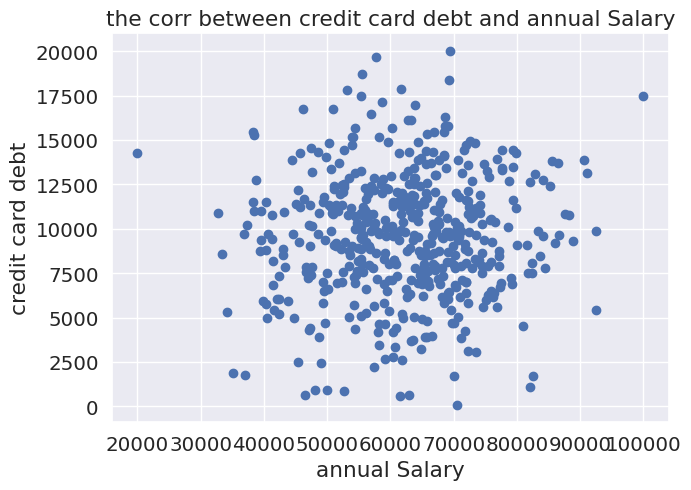

In [63]:
#Untuk menampil annual Salary dan credit card debt pada grafik berdasarkan dataframe
plt.scatter(df['annual Salary'], df['credit card debt'])
#Untuk memberikan label annual Salary pada sumbu x
plt.xlabel('annual Salary')
#Untuk memberikan label credit card debt pada sumbu y
plt.ylabel('credit card debt')
#Untuk memberikan judul pada grafik dengan nama the corr between credit card debt and annual Salary
plt.title('the corr between credit card debt and annual Salary')

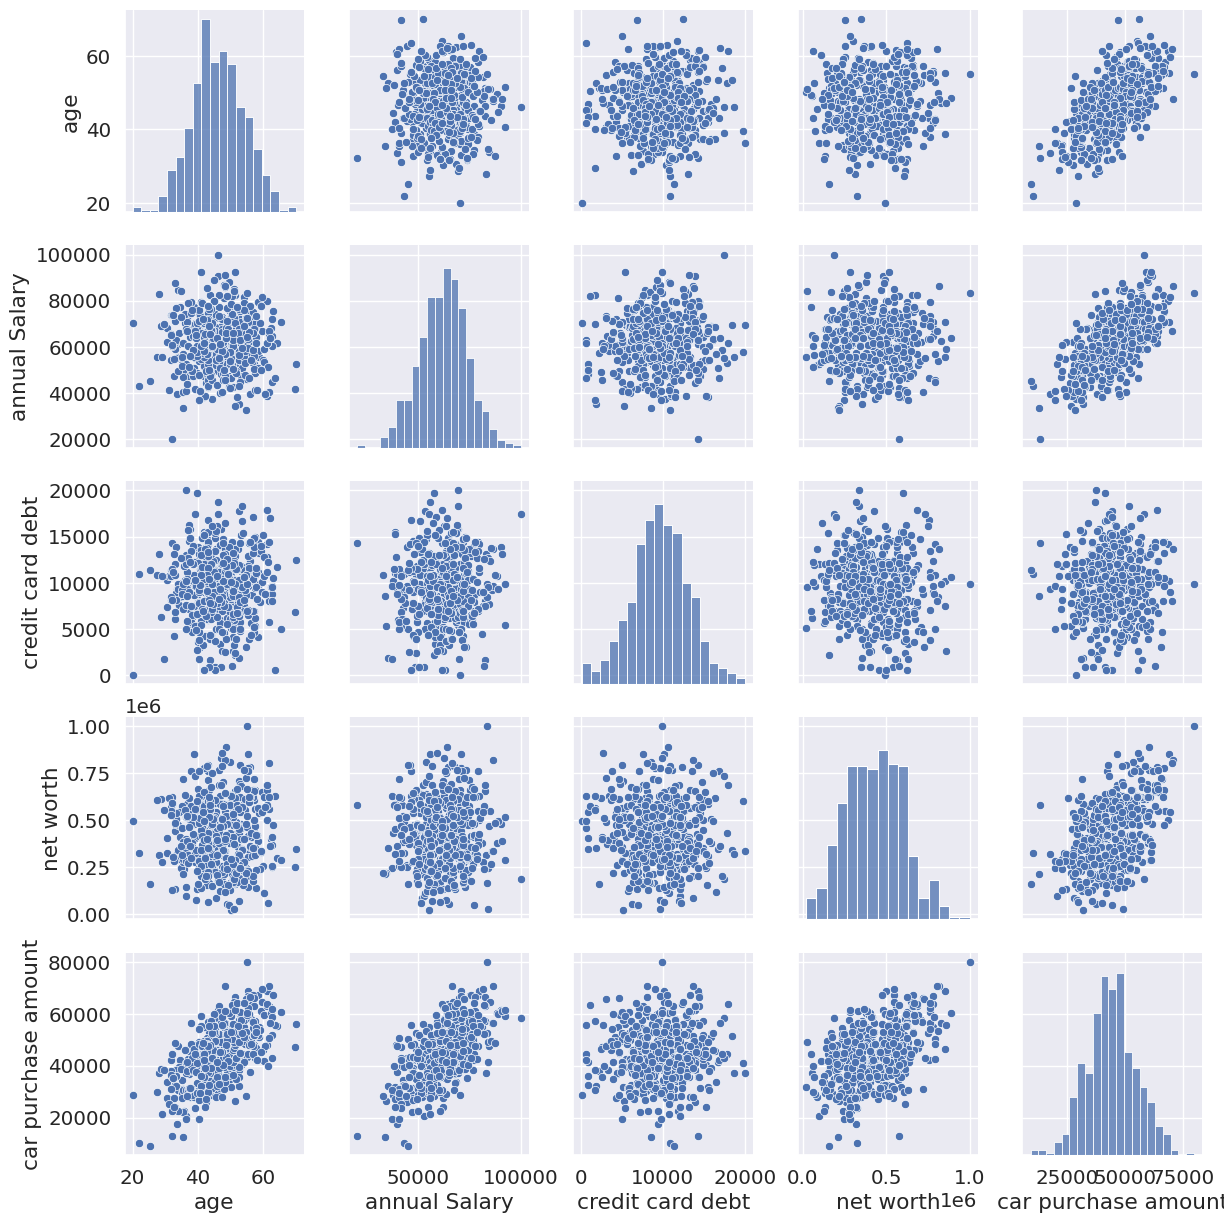

In [64]:
#Untuk menampilkan grafik sesuai dengan dataframe
sns.pairplot(df)

In [65]:
#Untuk memilih semua kolom pada dataframe dan untuk memisahkan variabel data
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [66]:
#Untuk mengukur skala terhadap variabel X dan y
scale = MinMaxScaler()
X = scale.fit_transform(X)
y = scale.fit_transform(y.values.reshape(-1, 1))
#Untuk memisahkan data antara X dan Y train, dengan X dan Y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [67]:
#Untuk membuat data pada X dan Y menjadi regresi linear
lreg = LinearRegression()
lreg.fit(X_train, y_train)
#Untuk menampil nilai dari regresi X dan Y train, serta X dan Y test
print('Train score', lreg.score(X_train, y_train))
print('Test score', lreg.score(X_test, y_test))

Train score 0.9999999817191522
Test score 0.9999999781425756


In [68]:
#Untuk memprediksi menggunakan model regresi linear
y_pred = lreg.predict(X_test)

In [69]:
#Untuk membuat lapisan neural network
ann = Sequential([Dense(32, activation="relu"), Dense(1, activation='linear')])
#Untuk melakukan compile ke model dari neural network
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
#Untuk menampil model dari neural network sampai 50 epoch
history = ann.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 23ms/step - loss: 0.1318 - mean_absolute_error: 0.3313 - val_loss: 0.0924 - val_mean_absolute_error: 0.2691
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0566 - mean_absolute_error: 0.2021 - val_loss: 0.0365 - val_mean_absolute_error: 0.1607
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.1242 - val_loss: 0.0180 - val_mean_absolute_error: 0.1089
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.1076 - val_loss: 0.0164 - val_mean_absolute_error: 0.1030
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.1091 - val_loss: 0.0158 - val_mean_absolute_error: 0.1014
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.1058 - val_loss: 0.0153 - val_mean_absolute_error: 0.0993
Epoch 7/50
10/10 [=========

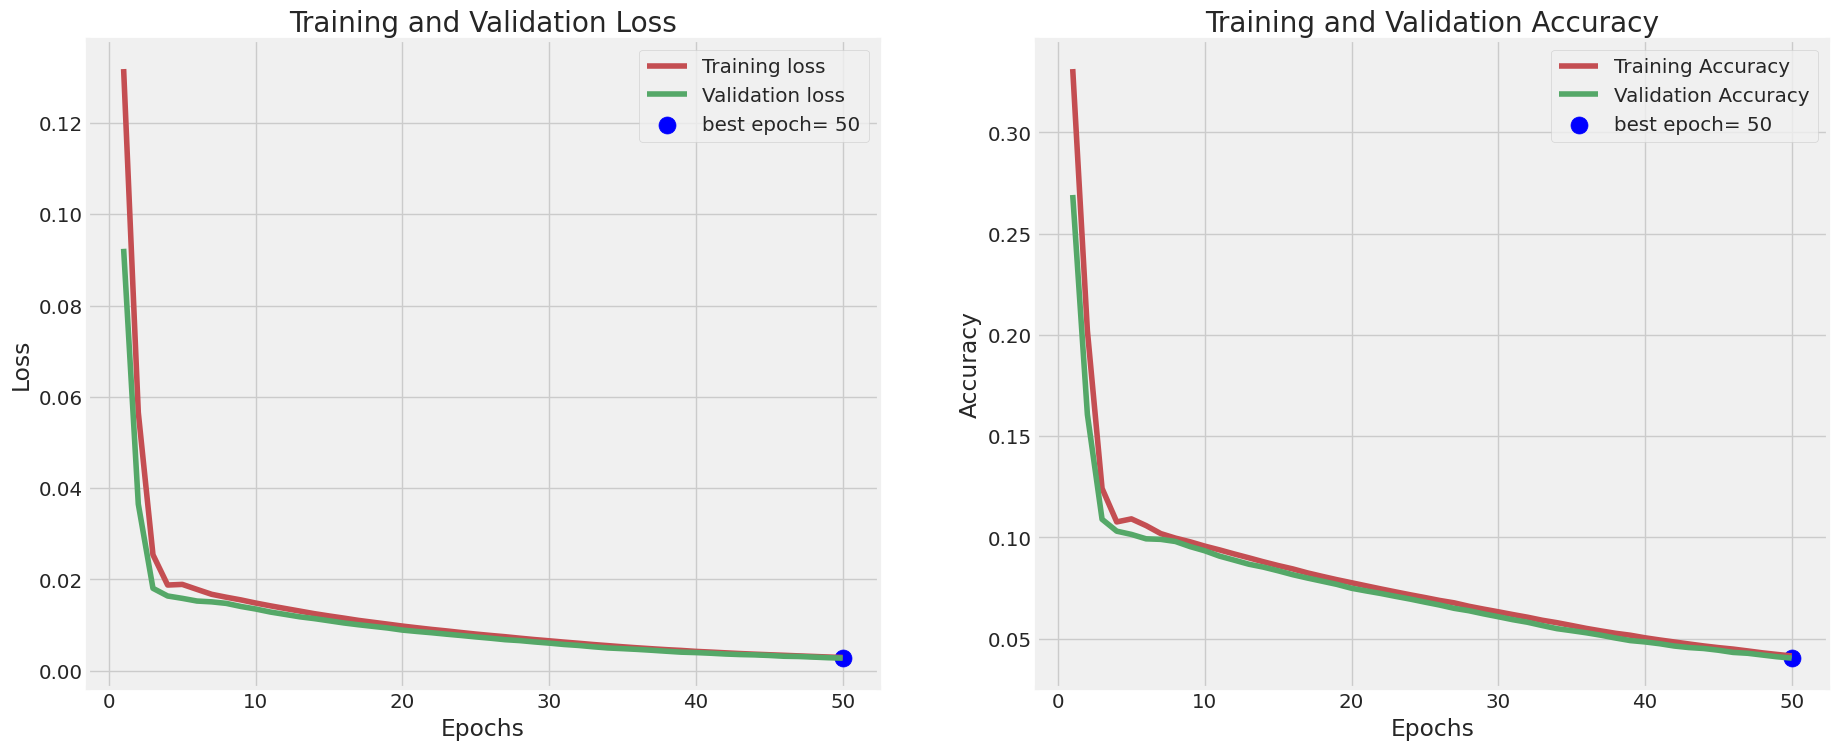

In [70]:
#Untuk mengambil hasil dari epoch
tr_acc = history.history['mean_absolute_error']
#Untuk mengambil hasil dari neural network pada loss
tr_loss = history.history['loss']
#Untuk mengambil hasil dari epoch
val_acc = history.history['val_mean_absolute_error']
#Untuk mengambil hasil dari neural network pada val_loss
val_loss = history.history['val_loss']
#Untuk menentukan nilai terendah dari val_loss
index_loss = np.argmin(val_loss)
#Untuk mengambil nilai terendah dari val_loss
val_lowest = val_loss[index_loss]
#Untuk menentukan nilai tertinggi dari val_acc
index_acc = np.argmin(val_acc)
#Untuk mengambil nilai tertinggi dari val_acc
acc_highest = val_acc[index_acc]

#Untuk membuat hasil dari data
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

#Untuk menentukan ukuran dari grafik
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

#Untuk memberikan letak grafik pertama
plt.subplot(1, 2, 1)
#Untuk menampilkan grafik dari tr_loss
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
#Untuk menampilkan grafik dari val_loss
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
#Untuk memberikan nilai dan memberikan warna pada grafik untuk membedakan
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
#Memberikan judul pada grafik pertama
plt.title('Training and Validation Loss')
#Menambahkan label pada sumbu X dengan nama Epochs
plt.xlabel('Epochs')
#Menambahkan label pada sumbu Y dengan nama Loss
plt.ylabel('Loss')
#Menampilkan grafik
plt.legend()

#Untuk memberikan letak grafik kedua
plt.subplot(1, 2, 2)
#Untuk menampilkan grafik dari tr_acc dengan nama Training Accuracy
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
#Untuk menampilkan grafik dari val_acc dengan nama Validation Accuracy
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
#Untuk memberikan nilai dan memberikan warna pada grafik untuk membedakan
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
#Memberikan judul pada grafik kedua
plt.title('Training and Validation Accuracy')
#Menambahkan label pada sumbu X dengan nama Epochs
plt.xlabel('Epochs')
#Menambahkan label pada sumbu Y dengan nama Accuracy
plt.ylabel('Accuracy')
#Menampilkan grafik
plt.legend()

#Untuk memberikan tata leatk atau layout
plt.tight_layout
#Untuk menampilkan grafik yang sudah dibuat
plt.show()

In [72]:
#Untuk membuat prediksi dengan menggunakan ANN
ann_y_pred = ann.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [73]:
#Untuk menghitung nilai target dan nilai sebenarnya
r2 = r2_score(y_test, y_pred)
#Untuk menampilkan hasil dari r2
print('R2 score:', r2)

R2 score: 0.9999999781425756


In [74]:
#Untuk mengevaluasi dari hasil ANN
ann.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0026 - mean_absolute_error: 0.0423


[0.0026068061124533415, 0.0422724150121212]

In [75]:
#Untuk memprediksi hasil dengan menggunakan neural network atau ANN
ann.predict([[40, 70000.500, 9550,534000]])

1/1 [==============================] - 0s 55ms/step


array([[230827.28]], dtype=float32)

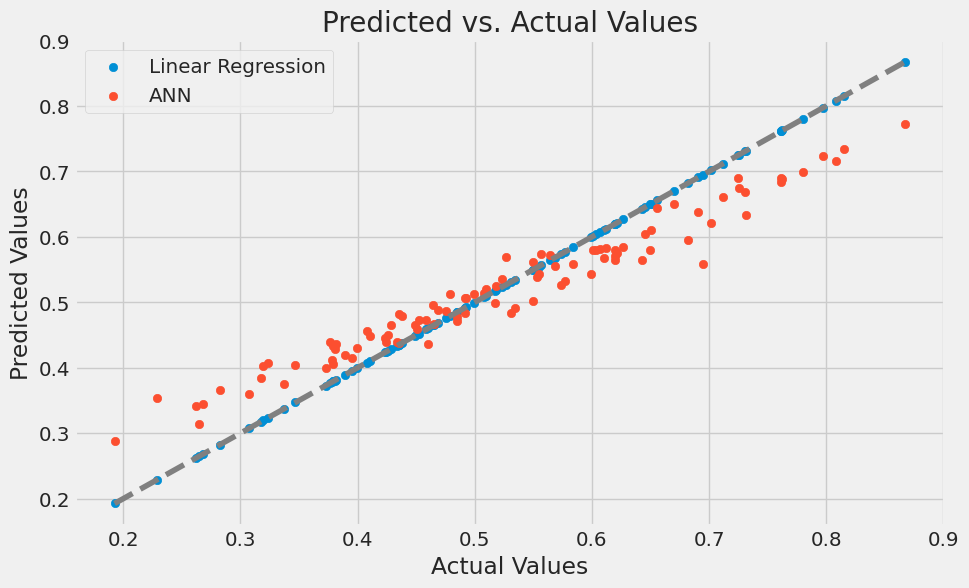

In [76]:
#Untuk mengatur ukuran dari grafik yang ditampilkan
plt.figure(figsize=(10, 6))
#Untuk mengisi label Linear Regression dengan nilai y_test dan y_pred
plt.scatter(y_test, y_pred, label='Linear Regression')
#Untuk mengisi label ANN dengan nilai y_test dan ann_y_test
plt.scatter(y_test, ann_y_pred, label='ANN')
#Untuk membuat grafik, seperti garis dan memberikan warna
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
#Untuk memberikan label pada sumbu x dengan nama Actual Values
plt.xlabel('Actual Values')
#Untuk memberikan label pada sumbu y dengan nama Predicted Values
plt.ylabel('Predicted Values')
#Untuk memberikan judul pada grafik
plt.title('Predicted vs. Actual Values')
plt.legend()
#Untuk menampilkan grafik
plt.show()

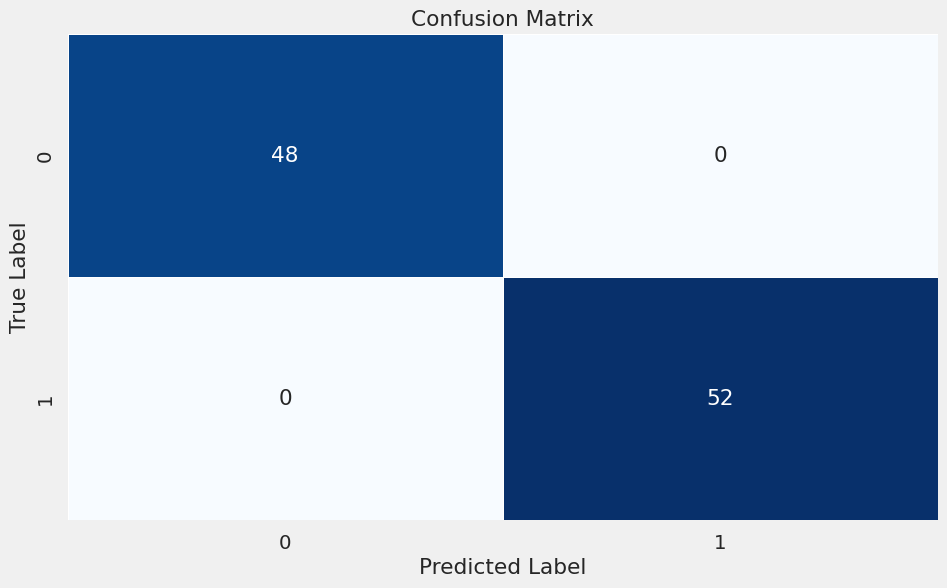

In [77]:
#Confuison Matrix

#Menambahkan nilai threshold
threshold = 0.5

#Melakukan konversi dari nilai regresi menjadi kelas
y_pred_class = (y_pred > threshold).astype(int)
#Untuk menghitung confusion matrix
conf_matrix = confusion_matrix(y_test > threshold, y_pred > threshold)

#Menentukan ukuran tabel
plt.figure(figsize=(10, 6))
#Menentukan ukuran font pada tabel
sns.set(font_scale=1.3)
#Memberikan nilai sesuai dengan hasil confusion matrix dan memberikan warna
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
#Memberikan label pada sumbu X dengan nama Predicted Label
plt.xlabel('Predicted Label')
#Memberikan label pada sumbu Y dengan nama True Label
plt.ylabel('True Label')
#Memberikan judul pada tabel
plt.title('Confusion Matrix')
#Menampilkan tabel
plt.show()


In [78]:
# Menentukan threshold
threshold = 0.5
# Mengubah prediksi menjadi label kelas
y_pred_class = (y_pred > threshold).astype(int)
# Menghitung classification report
classification_rep = classification_report(y_test > threshold, y_pred > threshold)
# Menampilkan classification report
print(classification_rep)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        48
        True       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

